In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from mpl_toolkits.mplot3d import Axes3D
import tqdm as tqdm

In [25]:
N, M, T = 30, 30, 30
x_start, x_end = 0, 1
y_start, y_end = 0, 1
t_start, t_end = 0, 2.5

h_x = x_end/(N-1)
h_y = y_end/(M-2)
tau = t_end/(T)

gamma_1 = tau/(h_x**2)
gamma_2 = tau/(h_y**2)

x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start - h_y/2, y_end +h_y/2, M)
t = np.linspace(t_start, t_end, T)
u = np.zeros((N,M,2*T+1))

for n in range(0,N):
    for m in range(0,M):
        u[n,m,0]= sin(2*pi*x[n])

In [26]:
def progonka_X(m,j):
    alpha=np.zeros(N)
    beta = np.zeros(N)
    alpha[1]=0
    beta[1]=0
    A_x = 0.5*gamma_1
    B_x = 1 + gamma_1
    C_x = 0.5*gamma_1
    
    u[0,m,j]=0
    for n in range (1,N-1):
        F_x = 0.5*gamma_2*(u[n,m-1,j-1]+u[n,m+1,j-1])+(1-gamma_2)*u[n,m,j-1]+ 0.5 * tau * exp(-tau * (j+1)/2) * np.sin(2*np.pi*x[n])
        alpha[n+1] = C_x/(B_x - A_x*alpha[n])
        beta[n+1] = (F_x + A_x*beta[n])/(B_x-A_x*alpha[n])
        
    u[N-1,m,j] = 0
    for n in range(N-1,0,-1):
        u[n-1,m,j] = alpha[n]*u[n,m,j] + beta[n]

In [27]:
def progonka_Y(n,j):
    alpha=np.zeros(M)
    beta = np.zeros(M)
    alpha[1]=1
    beta[1]=0
    A_y = 0.5*gamma_2
    B_y = 1 + gamma_2
    C_y = 0.5*gamma_2
    for m in range(1,M-1):
        F_y = 0.5*gamma_1*(u[n-1,m,j-1]+u[n+1,m,j-1])+(1-gamma_1)*u[n,m,j-1]+ 0.5 * tau * np.exp(-tau * (j-1)/2) * np.sin(2*np.pi*x[n])
        alpha[m+1] = C_y/(B_y - A_y*alpha[m])
        beta[m+1] = (F_y + A_y*beta[m])/(B_y - A_y*alpha[m])
        
        u[n, M-1, j]=beta[-1]/(1-alpha[-1])
        for m in range(M-1,0,-1):
            u[n,m-1,j]=alpha[m]*u[n,m,j]+beta[m]

In [28]:
for j in tqdm.tqdm_notebook(range(1,2*T+1,2)):
    for m in range(1,M-1):
        progonka_X(m,j)
    for n in range(1,N-1):
        progonka_Y(n,j+1)
    for m in range(0,M):
        u[0,m,j+1]=0
        u[N-1,m,j+1]=0

C:\Users\ty\Documents\ВУЗ\6 семестр\ОММ\Прога\WPy64-3770\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Text(0.5, 0.92, 'Численное решение')

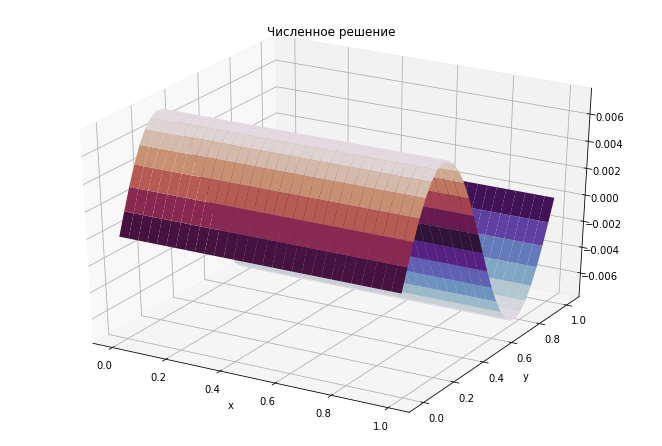

In [34]:
#3D график
fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
x1, y1 = np.meshgrid(x,y)
ax.plot_surface(x1,y1,u[:,:,int(T)],cmap='twilight')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Численное решение')